<a href="https://colab.research.google.com/github/gar22891uvg/ProyectoFinalGRP4/blob/main/Tarea%20Semana%203_GRP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Universidad UVG y Tigo**<br>
**Tarea Semana 3**<br>
Grupo 4<br>
Victor De León<br>
Jaime García<br>
Feature Engineering<br>

Experimentación con transformaciones de datos numéricos y categóricos.
El objetivo de la tercera tarea de la clase es que los estudiantes utilicen los diferentes métodos de transformación aprendidos en clase sobre los datos que utilizarán para su proyecto final. Con esto se busca que los estudiantes se familiaricen con el uso de diferentes librerías aplicadas sobre datos reales, así como que ejerciten su capacidad de interpretar de forma crítica los resultados obtenidos.

In [6]:
import warnings;
warnings.simplefilter('ignore')

In [7]:
import prophet
from prophet import Prophet

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Python


Proyecto Final
Grupo 4
Feature Engineering
Victor De Leon
Jaime Garcia


In [9]:
df = pd.read_csv('REC4.csv',parse_dates=True)

In [10]:
df.head(5)

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY
0,1-Nov-22,Internac,1,13997,1157375,155
1,1-Nov-22,direct1,2,9666,168465,163
2,1-Nov-22,dist1,3,9172,137949,164
3,1-Nov-22,digi1,4,3494,83306,154
4,1-Nov-22,online2,6,3251,80198,100


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5162 entries, 0 to 5161
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   FECHA    5162 non-null   object
 1   NOMBRE   5162 non-null   object
 2   CODIGO   5162 non-null   int64 
 3   TRAFICO  5162 non-null   int64 
 4   CANT     5162 non-null   int64 
 5   DELAY    5162 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 242.1+ KB


Modelacion de series de tiempo con Auto_ARIMA

In [12]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.6 MB/s eta 0:00:00


In [13]:
from ast import increment_lineno
import pandas as pd
import numpy as np

#Visualizacion de los datos

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#No presentar advertencia
import warnings
warnings.filterwarnings("ignore")

#Visualizamos todas las columnas
pd.set_option('display.max_columns',None)

In [14]:
df_arima=df #Tome el dataframe original

In [15]:
df_arima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5162 entries, 0 to 5161
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   FECHA    5162 non-null   object
 1   NOMBRE   5162 non-null   object
 2   CODIGO   5162 non-null   int64 
 3   TRAFICO  5162 non-null   int64 
 4   CANT     5162 non-null   int64 
 5   DELAY    5162 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 242.1+ KB


In [16]:
df_arima = df_arima[df.NOMBRE=='Internac'][['FECHA','NOMBRE','CODIGO','TRAFICO','CANT','DELAY']] # let's focus on Internac
df_arima ['traff_x1000']= df_arima.TRAFICO/1000 # transform 
df_arima ['qty_x1000']= df_arima.CANT/1000 # transform

df_arima

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000
0,1-Nov-22,Internac,1,13997,1157375,155,13.997,1157.375
24,2-Nov-22,Internac,1,12754,1062818,187,12.754,1062.818
49,3-Nov-22,Internac,1,12441,1040217,165,12.441,1040.217
74,4-Nov-22,Internac,1,23045,1800050,145,23.045,1800.050
100,5-Nov-22,Internac,1,21942,1830014,162,21.942,1830.014
...,...,...,...,...,...,...,...,...
5023,7-May-23,Internac,1,24291,2078916,175,24.291,2078.916
5049,8-May-23,Internac,1,21585,1748671,180,21.585,1748.671
5089,9-May-23,Internac,1,14133,1193611,184,14.133,1193.611
5115,10-May-23,Internac,1,14426,1215262,209,14.426,1215.262


In [17]:
df_arima.head()

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000
0,1-Nov-22,Internac,1,13997,1157375,155,13.997,1157.375
24,2-Nov-22,Internac,1,12754,1062818,187,12.754,1062.818
49,3-Nov-22,Internac,1,12441,1040217,165,12.441,1040.217
74,4-Nov-22,Internac,1,23045,1800050,145,23.045,1800.050
100,5-Nov-22,Internac,1,21942,1830014,162,21.942,1830.014


In [18]:
df_arima.reset_index(drop=True, inplace=True)
lag_features = ["traff_x1000", "qty_x1000"]
window1 = 3
window2 = 7
window3 = 30



In [19]:
df_rolled_3d = df_arima[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df_arima[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df_arima[lag_features].rolling(window=window3, min_periods=0)

In [20]:
df_mean_3d = df_rolled_3d.mean().shift(1).reset_index()
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index()
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index()

df_std_3d = df_rolled_3d.std().shift(1).reset_index()
df_std_7d = df_rolled_7d.std().shift(1).reset_index()
df_std_30d = df_rolled_30d.std().shift(1).reset_index()



In [21]:
for feature in lag_features:
  df_arima[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
  df_arima[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
  df_arima[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]

  df_arima[f"{feature}_std_lag{window1}"] = df_mean_3d[feature]
  df_arima[f"{feature}_std_lag{window2}"] = df_mean_7d[feature]
  df_arima[f"{feature}_std_lag{window3}"] = df_mean_30d[feature]

df.fillna(df_arima.mean(), inplace=True)

In [22]:
df_arima.head()

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,traff_x1000_mean_lag3,traff_x1000_mean_lag7,traff_x1000_mean_lag30,traff_x1000_std_lag3,traff_x1000_std_lag7,traff_x1000_std_lag30,qty_x1000_mean_lag3,qty_x1000_mean_lag7,qty_x1000_mean_lag30,qty_x1000_std_lag3,qty_x1000_std_lag7,qty_x1000_std_lag30
0,1-Nov-22,Internac,1,13997,1157375,155,13.997,1157.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2-Nov-22,Internac,1,12754,1062818,187,12.754,1062.818,13.9970,13.99700,13.99700,13.9970,13.99700,13.99700,1157.375000,1157.375000,1157.375000,1157.375000,1157.375000,1157.375000
2,3-Nov-22,Internac,1,12441,1040217,165,12.441,1040.217,13.3755,13.37550,13.37550,13.3755,13.37550,13.37550,1110.096500,1110.096500,1110.096500,1110.096500,1110.096500,1110.096500
3,4-Nov-22,Internac,1,23045,1800050,145,23.045,1800.050,13.0640,13.06400,13.06400,13.0640,13.06400,13.06400,1086.803333,1086.803333,1086.803333,1086.803333,1086.803333,1086.803333
4,5-Nov-22,Internac,1,21942,1830014,162,21.942,1830.014,16.0800,15.55925,15.55925,16.0800,15.55925,15.55925,1301.028333,1265.115000,1265.115000,1301.028333,1265.115000,1265.115000


In [23]:
df_arima.tail()

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,traff_x1000_mean_lag3,traff_x1000_mean_lag7,traff_x1000_mean_lag30,traff_x1000_std_lag3,traff_x1000_std_lag7,traff_x1000_std_lag30,qty_x1000_mean_lag3,qty_x1000_mean_lag7,qty_x1000_mean_lag30,qty_x1000_std_lag3,qty_x1000_std_lag7,qty_x1000_std_lag30
187,7-May-23,Internac,1,24291,2078916,175,24.291,2078.916,18.261333,18.046143,18.512433,18.261333,18.046143,18.512433,1518.065667,1514.777571,1543.147967,1518.065667,1514.777571,1543.147967
188,8-May-23,Internac,1,21585,1748671,180,21.585,1748.671,22.264000,18.127286,18.569867,22.264000,18.127286,18.569867,1859.990667,1522.528000,1552.474067,1859.990667,1522.528000,1552.474067
189,9-May-23,Internac,1,14133,1193611,184,14.133,1193.611,22.183667,18.216286,18.592867,22.183667,18.216286,18.592867,1860.131667,1526.294143,1552.064800,1860.131667,1526.294143,1552.064800
190,10-May-23,Internac,1,14426,1215262,209,14.426,1215.262,20.003000,18.199143,18.280000,20.003000,18.199143,18.280000,1673.732667,1520.895571,1525.769200,1673.732667,1520.895571,1525.769200
191,11-May-23,Internac,1,11192,946725,186,11.192,946.725,16.714667,18.459857,18.052933,16.714667,18.459857,18.052933,1385.848000,1541.522429,1508.592767,1385.848000,1541.522429,1508.592767


In [24]:
df_arima.FECHA = pd.to_datetime(df_arima.FECHA)

In [25]:
df_arima["year"] = df_arima.FECHA.dt.year
df_arima["months"] = df_arima.FECHA.dt.month
df_arima["week"] = df_arima.FECHA.dt.week
df_arima["day"] = df_arima.FECHA.dt.day
df_arima["day_of_week"] = df_arima.FECHA.dt.day_of_week
df_arima.head()

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,traff_x1000_mean_lag3,traff_x1000_mean_lag7,traff_x1000_mean_lag30,traff_x1000_std_lag3,traff_x1000_std_lag7,traff_x1000_std_lag30,qty_x1000_mean_lag3,qty_x1000_mean_lag7,qty_x1000_mean_lag30,qty_x1000_std_lag3,qty_x1000_std_lag7,qty_x1000_std_lag30,year,months,week,day,day_of_week
0,2022-11-01,Internac,1,13997,1157375,155,13.997,1157.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,11,44,1,1
1,2022-11-02,Internac,1,12754,1062818,187,12.754,1062.818,13.9970,13.99700,13.99700,13.9970,13.99700,13.99700,1157.375000,1157.375000,1157.375000,1157.375000,1157.375000,1157.375000,2022,11,44,2,2
2,2022-11-03,Internac,1,12441,1040217,165,12.441,1040.217,13.3755,13.37550,13.37550,13.3755,13.37550,13.37550,1110.096500,1110.096500,1110.096500,1110.096500,1110.096500,1110.096500,2022,11,44,3,3
3,2022-11-04,Internac,1,23045,1800050,145,23.045,1800.050,13.0640,13.06400,13.06400,13.0640,13.06400,13.06400,1086.803333,1086.803333,1086.803333,1086.803333,1086.803333,1086.803333,2022,11,44,4,4
4,2022-11-05,Internac,1,21942,1830014,162,21.942,1830.014,16.0800,15.55925,15.55925,16.0800,15.55925,15.55925,1301.028333,1265.115000,1265.115000,1301.028333,1265.115000,1265.115000,2022,11,44,5,5


In [83]:
NAVIDAD = pd.DataFrame({
    'holiday': 'Navidad',
    'ds':pd.to_datetime(['2022-12-25']),
    'lower_window': -1,
    'upper_window':0,
})

AÑONUEVO = pd.DataFrame({
    'holiday': 'Año Nuevo',
    'ds':pd.to_datetime(['2023-01-01']),
    'lower_window': -1,
    'upper_window':0,
})

holidays = pd.concat((NAVIDAD, AÑONUEVO))

In [84]:
holidays

,holiday,ds,lower_window,upper_window
0,Navidad,2022-12-25,-1,0
0,Año Nuevo,2023-01-01,-1,0


In [57]:
#df_arima_train = df_arima[df_arima.FECHA < "2023"]
#df_arima_valid = df_arima[df_arima.FECHA >= "2023"]

df_arima_train = df_arima.iloc[:len(df_arima)-30]
df_arima_valid = df_arima.iloc[len(df_arima)-30:]

In [58]:
df_arima_train

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,traff_x1000_mean_lag3,traff_x1000_mean_lag7,traff_x1000_mean_lag30,traff_x1000_std_lag3,traff_x1000_std_lag7,traff_x1000_std_lag30,qty_x1000_mean_lag3,qty_x1000_mean_lag7,qty_x1000_mean_lag30,qty_x1000_std_lag3,qty_x1000_std_lag7,qty_x1000_std_lag30,year,months,week,day,day_of_week,ds
0,2022-11-01,Internac,1,13997,1157375,155,13.997,1157.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,11,44,1,1,2022-11-01
1,2022-11-02,Internac,1,12754,1062818,187,12.754,1062.818,13.997000,13.997000,13.997000,13.997000,13.997000,13.997000,1157.375000,1157.375000,1157.375000,1157.375000,1157.375000,1157.375000,2022,11,44,2,2,2022-11-02
2,2022-11-03,Internac,1,12441,1040217,165,12.441,1040.217,13.375500,13.375500,13.375500,13.375500,13.375500,13.375500,1110.096500,1110.096500,1110.096500,1110.096500,1110.096500,1110.096500,2022,11,44,3,3,2022-11-03
3,2022-11-04,Internac,1,23045,1800050,145,23.045,1800.050,13.064000,13.064000,13.064000,13.064000,13.064000,13.064000,1086.803333,1086.803333,1086.803333,1086.803333,1086.803333,1086.803333,2022,11,44,4,4,2022-11-04
4,2022-11-05,Internac,1,21942,1830014,162,21.942,1830.014,16.080000,15.559250,15.559250,16.080000,15.559250,15.559250,1301.028333,1265.115000,1265.115000,1301.028333,1265.115000,1265.115000,2022,11,44,5,5,2022-11-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,2023-04-07,Internac,1,22568,1799133,154,22.568,1799.133,12.953667,18.208571,17.855967,12.953667,18.208571,17.855967,1095.458000,1515.199286,1480.044033,1095.458000,1515.199286,1480.044033,2023,4,14,7,4,2023-04-07
158,2023-04-08,Internac,1,20895,1760949,177,20.895,1760.949,16.051000,18.257429,18.195133,16.051000,18.257429,18.195133,1323.032333,1520.292286,1505.231500,1323.032333,1520.292286,1505.231500,2023,4,14,8,5,2023-04-08
159,2023-04-09,Internac,1,23519,1982479,163,23.519,1982.479,18.779333,18.114286,18.496333,18.779333,18.114286,18.496333,1550.225333,1507.283857,1530.742533,1550.225333,1507.283857,1530.742533,2023,4,14,9,6,2023-04-09
160,2023-04-10,Internac,1,21238,1730555,172,21.238,1730.555,22.327333,18.131429,18.507267,22.327333,18.131429,18.507267,1847.520333,1506.023714,1535.535467,1847.520333,1506.023714,1535.535467,2023,4,15,10,0,2023-04-10


In [59]:
df_arima_train.head()

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,traff_x1000_mean_lag3,traff_x1000_mean_lag7,traff_x1000_mean_lag30,traff_x1000_std_lag3,traff_x1000_std_lag7,traff_x1000_std_lag30,qty_x1000_mean_lag3,qty_x1000_mean_lag7,qty_x1000_mean_lag30,qty_x1000_std_lag3,qty_x1000_std_lag7,qty_x1000_std_lag30,year,months,week,day,day_of_week,ds
0,2022-11-01,Internac,1,13997,1157375,155,13.997,1157.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,11,44,1,1,2022-11-01
1,2022-11-02,Internac,1,12754,1062818,187,12.754,1062.818,13.9970,13.99700,13.99700,13.9970,13.99700,13.99700,1157.375000,1157.375000,1157.375000,1157.375000,1157.375000,1157.375000,2022,11,44,2,2,2022-11-02
2,2022-11-03,Internac,1,12441,1040217,165,12.441,1040.217,13.3755,13.37550,13.37550,13.3755,13.37550,13.37550,1110.096500,1110.096500,1110.096500,1110.096500,1110.096500,1110.096500,2022,11,44,3,3,2022-11-03
3,2022-11-04,Internac,1,23045,1800050,145,23.045,1800.050,13.0640,13.06400,13.06400,13.0640,13.06400,13.06400,1086.803333,1086.803333,1086.803333,1086.803333,1086.803333,1086.803333,2022,11,44,4,4,2022-11-04
4,2022-11-05,Internac,1,21942,1830014,162,21.942,1830.014,16.0800,15.55925,15.55925,16.0800,15.55925,15.55925,1301.028333,1265.115000,1265.115000,1301.028333,1265.115000,1265.115000,2022,11,44,5,5,2022-11-05


In [60]:
df_arima_train.tail()

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,traff_x1000_mean_lag3,traff_x1000_mean_lag7,traff_x1000_mean_lag30,traff_x1000_std_lag3,traff_x1000_std_lag7,traff_x1000_std_lag30,qty_x1000_mean_lag3,qty_x1000_mean_lag7,qty_x1000_mean_lag30,qty_x1000_std_lag3,qty_x1000_std_lag7,qty_x1000_std_lag30,year,months,week,day,day_of_week,ds
157,2023-04-07,Internac,1,22568,1799133,154,22.568,1799.133,12.953667,18.208571,17.855967,12.953667,18.208571,17.855967,1095.458000,1515.199286,1480.044033,1095.458000,1515.199286,1480.044033,2023,4,14,7,4,2023-04-07
158,2023-04-08,Internac,1,20895,1760949,177,20.895,1760.949,16.051000,18.257429,18.195133,16.051000,18.257429,18.195133,1323.032333,1520.292286,1505.231500,1323.032333,1520.292286,1505.231500,2023,4,14,8,5,2023-04-08
159,2023-04-09,Internac,1,23519,1982479,163,23.519,1982.479,18.779333,18.114286,18.496333,18.779333,18.114286,18.496333,1550.225333,1507.283857,1530.742533,1550.225333,1507.283857,1530.742533,2023,4,14,9,6,2023-04-09
160,2023-04-10,Internac,1,21238,1730555,172,21.238,1730.555,22.327333,18.131429,18.507267,22.327333,18.131429,18.507267,1847.520333,1506.023714,1535.535467,1847.520333,1506.023714,1535.535467,2023,4,15,10,0,2023-04-10
161,2023-04-11,Internac,1,13379,1136829,162,13.379,1136.829,21.884000,18.154429,18.500467,21.884000,18.154429,18.500467,1824.661000,1508.498571,1533.416933,1824.661000,1508.498571,1533.416933,2023,4,15,11,1,2023-04-11


In [61]:
df_arima_valid.head()

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,traff_x1000_mean_lag3,traff_x1000_mean_lag7,traff_x1000_mean_lag30,traff_x1000_std_lag3,traff_x1000_std_lag7,traff_x1000_std_lag30,qty_x1000_mean_lag3,qty_x1000_mean_lag7,qty_x1000_mean_lag30,qty_x1000_std_lag3,qty_x1000_std_lag7,qty_x1000_std_lag30,year,months,week,day,day_of_week,ds
162,2023-04-12,Internac,1,12417,1050175,179,12.417,1050.175,19.378667,18.169143,18.176033,19.378667,18.169143,18.176033,1616.621000,1511.415571,1506.157767,1616.621000,1511.415571,1506.157767,2023,4,15,12,2,2023-04-12
163,2023-04-13,Internac,1,12389,1052888,168,12.389,1052.888,15.678000,18.127286,17.891567,15.678000,18.127286,17.891567,1305.853000,1507.244857,1484.885867,1305.853000,1507.244857,1484.885867,2023,4,15,13,3,2023-04-13
164,2023-04-14,Internac,1,22636,1809846,169,22.636,1809.846,12.728333,18.057857,17.874233,12.728333,18.057857,17.874233,1079.964000,1501.858286,1483.851533,1079.964000,1501.858286,1483.851533,2023,4,15,14,4,2023-04-14
165,2023-04-15,Internac,1,20917,1766427,162,20.917,1766.427,15.814000,18.067571,18.197400,15.814000,18.067571,18.197400,1304.303000,1503.388714,1508.166400,1304.303000,1503.388714,1508.166400,2023,4,15,15,5,2023-04-15
166,2023-04-16,Internac,1,24570,2079448,190,24.570,2079.448,18.647333,18.070714,18.487667,18.647333,18.070714,18.487667,1543.053667,1504.171286,1532.882367,1543.053667,1504.171286,1532.882367,2023,4,15,16,6,2023-04-16


In [62]:
df_arima_valid.tail()

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,traff_x1000_mean_lag3,traff_x1000_mean_lag7,traff_x1000_mean_lag30,traff_x1000_std_lag3,traff_x1000_std_lag7,traff_x1000_std_lag30,qty_x1000_mean_lag3,qty_x1000_mean_lag7,qty_x1000_mean_lag30,qty_x1000_std_lag3,qty_x1000_std_lag7,qty_x1000_std_lag30,year,months,week,day,day_of_week,ds
187,2023-05-07,Internac,1,24291,2078916,175,24.291,2078.916,18.261333,18.046143,18.512433,18.261333,18.046143,18.512433,1518.065667,1514.777571,1543.147967,1518.065667,1514.777571,1543.147967,2023,5,18,7,6,2023-05-07
188,2023-05-08,Internac,1,21585,1748671,180,21.585,1748.671,22.264000,18.127286,18.569867,22.264000,18.127286,18.569867,1859.990667,1522.528000,1552.474067,1859.990667,1522.528000,1552.474067,2023,5,19,8,0,2023-05-08
189,2023-05-09,Internac,1,14133,1193611,184,14.133,1193.611,22.183667,18.216286,18.592867,22.183667,18.216286,18.592867,1860.131667,1526.294143,1552.064800,1860.131667,1526.294143,1552.064800,2023,5,19,9,1,2023-05-09
190,2023-05-10,Internac,1,14426,1215262,209,14.426,1215.262,20.003000,18.199143,18.280000,20.003000,18.199143,18.280000,1673.732667,1520.895571,1525.769200,1673.732667,1520.895571,1525.769200,2023,5,19,10,2,2023-05-10
191,2023-05-11,Internac,1,11192,946725,186,11.192,946.725,16.714667,18.459857,18.052933,16.714667,18.459857,18.052933,1385.848000,1541.522429,1508.592767,1385.848000,1541.522429,1508.592767,2023,5,19,11,3,2023-05-11


In [63]:
exogenous_features = ["traff_x1000_mean_lag3","traff_x1000_mean_lag7","traff_x1000_mean_lag30",
                      "traff_x1000_std_lag3","traff_x1000_std_lag7","traff_x1000_std_lag30",
                      "qty_x1000_mean_lag3","qty_x1000_mean_lag7", "qty_x1000_mean_lag30",
                      "qty_x1000_std_lag3", "qty_x1000_std_lag7", "qty_x1000_std_lag30",
                      "months", "week", "day", "day_of_week"]

In [64]:
from pmdarima import auto_arima

In [65]:
model = auto_arima(df_arima_train.qty_x1000, exogenous=df_arima_train[exogenous_features],trace=True, error_action="ignore", suppress_warnings=True)
model.fit(df_arima_train.qty_x1000,exogenous=df_arima_train[exogenous_features])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2386.485, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2358.218, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2353.896, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2835.872, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2353.352, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2332.469, Time=0.26 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2332.212, Time=0.51 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=2279.385, Time=0.92 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=2279.706, Time=0.73 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=2296.215, Time=0.61 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.39 sec

Best model:  ARIMA(0,0,3)(0,0,0)[0] intercept
Total 

ARIMA(order=(0, 0, 3), scoring_args={}, suppress_warnings=True)

In [66]:
forecast = model.predict(n_periods=len(df_arima_valid), exogenous=df_arima_valid[exogenous_features])
df_arima_valid["Forecast_ARIMAX"] = forecast

El modelo ARIMA más adecuado es ARIMA (1,0,0) que tiene el AIC más bajo

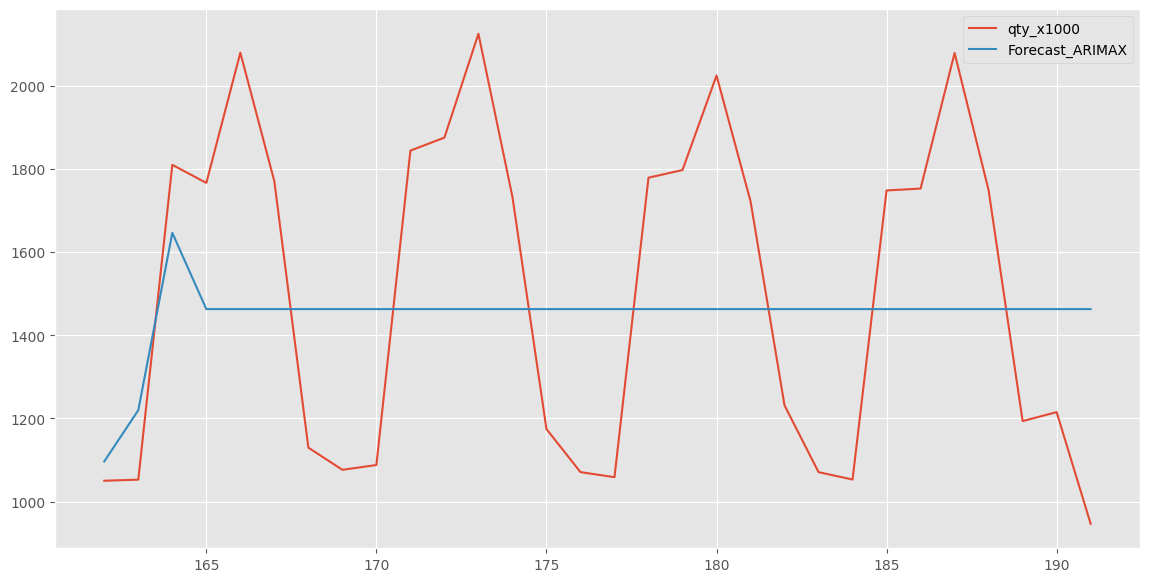

In [67]:
df_arima_valid[["qty_x1000","Forecast_ARIMAX"]].plot(figsize=(14,7));

In [68]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [69]:
print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(df_arima_valid.qty_x1000, df_arima_valid.Forecast_ARIMAX)))
print("MAE of Auto ARIMAX:", mean_squared_error(df_arima_valid.qty_x1000, df_arima_valid.Forecast_ARIMAX))

RMSE of Auto ARIMAX: 376.277063478457
MAE of Auto ARIMAX: 141584.4284999708


In [70]:
another_model = auto_arima(df_arima["qty_x1000"],start_p=1, start_q=1,
                          max_p=6,max_q=6, m=12,
                          start_P=0, seasonal=True,
                          d=1, D=1, trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.07 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2785.441, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2769.329, Time=0.46 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.12 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2779.705, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=inf, Time=3.83 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.86 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.61 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=2610.471, Time=4.26 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=2609.643, Time=4.84 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=6.93 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=4.22 sec
 ARIMA(2,1,0)(2,1,2)[12]             : AIC=2571.894, Time=7.55 sec
 ARIMA(2,1,0)(1,1,2)[12]             : AIC=inf, Time=4.06 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=2584.467, Time=6

In [71]:
another_model.fit(df_arima_train.qty_x1000,exogenous=df_arima_train[exogenous_features])

ARIMA(order=(2, 1, 0), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [72]:
forecast2 = another_model.predict(n_periods=len(df_arima_valid),exogenous=df_arima_valid[exogenous_features])
df_arima_valid["Forecast_SARIMA"] = forecast2

<Axes: >

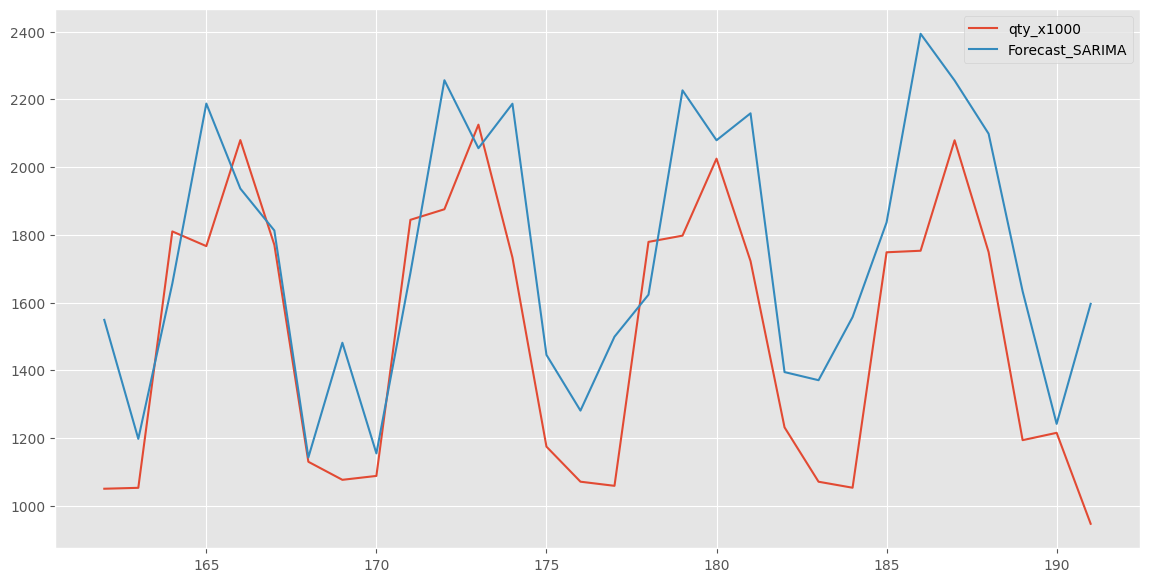

In [73]:
df_arima_valid[["qty_x1000","Forecast_SARIMA"]].plot(figsize=(14,7))

In [74]:
print("RMSE of Auto SARIMA:", np.sqrt(mean_squared_error(df_arima_valid.qty_x1000, df_arima_valid.Forecast_SARIMA)))
print("nMAE of Auto SARIMA:", mean_absolute_error(df_arima_valid.qty_x1000, df_arima_valid.Forecast_SARIMA))

RMSE of Auto SARIMA: 332.2396031965974
nMAE of Auto SARIMA: 276.0670658789505


Modelacion de Serie de Tiempo con Prophet

In [44]:
df_arima

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,traff_x1000_mean_lag3,traff_x1000_mean_lag7,traff_x1000_mean_lag30,traff_x1000_std_lag3,traff_x1000_std_lag7,traff_x1000_std_lag30,qty_x1000_mean_lag3,qty_x1000_mean_lag7,qty_x1000_mean_lag30,qty_x1000_std_lag3,qty_x1000_std_lag7,qty_x1000_std_lag30,year,months,week,day,day_of_week
0,2022-11-01,Internac,1,13997,1157375,155,13.997,1157.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,11,44,1,1
1,2022-11-02,Internac,1,12754,1062818,187,12.754,1062.818,13.997000,13.997000,13.997000,13.997000,13.997000,13.997000,1157.375000,1157.375000,1157.375000,1157.375000,1157.375000,1157.375000,2022,11,44,2,2
2,2022-11-03,Internac,1,12441,1040217,165,12.441,1040.217,13.375500,13.375500,13.375500,13.375500,13.375500,13.375500,1110.096500,1110.096500,1110.096500,1110.096500,1110.096500,1110.096500,2022,11,44,3,3
3,2022-11-04,Internac,1,23045,1800050,145,23.045,1800.050,13.064000,13.064000,13.064000,13.064000,13.064000,13.064000,1086.803333,1086.803333,1086.803333,1086.803333,1086.803333,1086.803333,2022,11,44,4,4
4,2022-11-05,Internac,1,21942,1830014,162,21.942,1830.014,16.080000,15.559250,15.559250,16.080000,15.559250,15.559250,1301.028333,1265.115000,1265.115000,1301.028333,1265.115000,1265.115000,2022,11,44,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2023-05-07,Internac,1,24291,2078916,175,24.291,2078.916,18.261333,18.046143,18.512433,18.261333,18.046143,18.512433,1518.065667,1514.777571,1543.147967,1518.065667,1514.777571,1543.147967,2023,5,18,7,6
188,2023-05-08,Internac,1,21585,1748671,180,21.585,1748.671,22.264000,18.127286,18.569867,22.264000,18.127286,18.569867,1859.990667,1522.528000,1552.474067,1859.990667,1522.528000,1552.474067,2023,5,19,8,0
189,2023-05-09,Internac,1,14133,1193611,184,14.133,1193.611,22.183667,18.216286,18.592867,22.183667,18.216286,18.592867,1860.131667,1526.294143,1552.064800,1860.131667,1526.294143,1552.064800,2023,5,19,9,1
190,2023-05-10,Internac,1,14426,1215262,209,14.426,1215.262,20.003000,18.199143,18.280000,20.003000,18.199143,18.280000,1673.732667,1520.895571,1525.769200,1673.732667,1520.895571,1525.769200,2023,5,19,10,2


In [45]:
df_arima['ds']= df_arima['year'].apply('{:0>2d}'.format) +'-' + df_arima['months'].apply('{:0>2d}'.format)+'-'+df_arima['day'].apply('{:0>2d}'.format) # To create a format mm-dd
df_arima

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,traff_x1000_mean_lag3,traff_x1000_mean_lag7,traff_x1000_mean_lag30,traff_x1000_std_lag3,traff_x1000_std_lag7,traff_x1000_std_lag30,qty_x1000_mean_lag3,qty_x1000_mean_lag7,qty_x1000_mean_lag30,qty_x1000_std_lag3,qty_x1000_std_lag7,qty_x1000_std_lag30,year,months,week,day,day_of_week,ds
0,2022-11-01,Internac,1,13997,1157375,155,13.997,1157.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,11,44,1,1,2022-11-01
1,2022-11-02,Internac,1,12754,1062818,187,12.754,1062.818,13.997000,13.997000,13.997000,13.997000,13.997000,13.997000,1157.375000,1157.375000,1157.375000,1157.375000,1157.375000,1157.375000,2022,11,44,2,2,2022-11-02
2,2022-11-03,Internac,1,12441,1040217,165,12.441,1040.217,13.375500,13.375500,13.375500,13.375500,13.375500,13.375500,1110.096500,1110.096500,1110.096500,1110.096500,1110.096500,1110.096500,2022,11,44,3,3,2022-11-03
3,2022-11-04,Internac,1,23045,1800050,145,23.045,1800.050,13.064000,13.064000,13.064000,13.064000,13.064000,13.064000,1086.803333,1086.803333,1086.803333,1086.803333,1086.803333,1086.803333,2022,11,44,4,4,2022-11-04
4,2022-11-05,Internac,1,21942,1830014,162,21.942,1830.014,16.080000,15.559250,15.559250,16.080000,15.559250,15.559250,1301.028333,1265.115000,1265.115000,1301.028333,1265.115000,1265.115000,2022,11,44,5,5,2022-11-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2023-05-07,Internac,1,24291,2078916,175,24.291,2078.916,18.261333,18.046143,18.512433,18.261333,18.046143,18.512433,1518.065667,1514.777571,1543.147967,1518.065667,1514.777571,1543.147967,2023,5,18,7,6,2023-05-07
188,2023-05-08,Internac,1,21585,1748671,180,21.585,1748.671,22.264000,18.127286,18.569867,22.264000,18.127286,18.569867,1859.990667,1522.528000,1552.474067,1859.990667,1522.528000,1552.474067,2023,5,19,8,0,2023-05-08
189,2023-05-09,Internac,1,14133,1193611,184,14.133,1193.611,22.183667,18.216286,18.592867,22.183667,18.216286,18.592867,1860.131667,1526.294143,1552.064800,1860.131667,1526.294143,1552.064800,2023,5,19,9,1,2023-05-09
190,2023-05-10,Internac,1,14426,1215262,209,14.426,1215.262,20.003000,18.199143,18.280000,20.003000,18.199143,18.280000,1673.732667,1520.895571,1525.769200,1673.732667,1520.895571,1525.769200,2023,5,19,10,2,2023-05-10


In [46]:
pred = df_arima[['qty_x1000','ds']]
pred.columns = ['y','ds']

In [47]:
pred.head()

,y,ds
0,1157.375,2022-11-01
1,1062.818,2022-11-02
2,1040.217,2022-11-03
3,1800.050,2022-11-04
4,1830.014,2022-11-05


In [86]:
m = Prophet(holidays=holidays, interval_width=0.95, seasonality_mode='additive', weekly_seasonality=True)
model = m.fit(pred)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5voizzzb/1joobq2z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5voizzzb/jksm71h5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72768', 'data', 'file=/tmp/tmp5voizzzb/1joobq2z.json', 'init=/tmp/tmp5voizzzb/jksm71h5.json', 'output', 'file=/tmp/tmp5voizzzb/prophet_modelk6vkicl3/prophet_model-20230528182416.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:24:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:24:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [89]:
future = m.make_future_dataframe(periods=14, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Año Nuevo,Año Nuevo_lower,Año Nuevo_upper,Navidad,Navidad_lower,Navidad_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-11-01,1517.561401,1027.531115,1263.687358,1517.561401,1517.561401,0.0,0.0,0.0,0.0,0.0,0.0,-369.782536,-369.782536,-369.782536,0.0,0.0,0.0,-369.782536,-369.782536,-369.782536,0.0,0.0,0.0,1147.778865
1,2022-11-02,1515.873335,968.776645,1212.214726,1515.873335,1515.873335,0.0,0.0,0.0,0.0,0.0,0.0,-428.031551,-428.031551,-428.031551,0.0,0.0,0.0,-428.031551,-428.031551,-428.031551,0.0,0.0,0.0,1087.841784
2,2022-11-03,1514.185269,945.386698,1190.202837,1514.185269,1514.185269,0.0,0.0,0.0,0.0,0.0,0.0,-446.676585,-446.676585,-446.676585,0.0,0.0,0.0,-446.676585,-446.676585,-446.676585,0.0,0.0,0.0,1067.508685
3,2022-11-04,1512.497204,1699.976138,1937.902814,1512.497204,1512.497204,0.0,0.0,0.0,0.0,0.0,0.0,306.455120,306.455120,306.455120,0.0,0.0,0.0,306.455120,306.455120,306.455120,0.0,0.0,0.0,1818.952324
4,2022-11-05,1510.809138,1670.397549,1890.242487,1510.809138,1510.809138,0.0,0.0,0.0,0.0,0.0,0.0,267.203943,267.203943,267.203943,0.0,0.0,0.0,267.203943,267.203943,267.203943,0.0,0.0,0.0,1778.013081


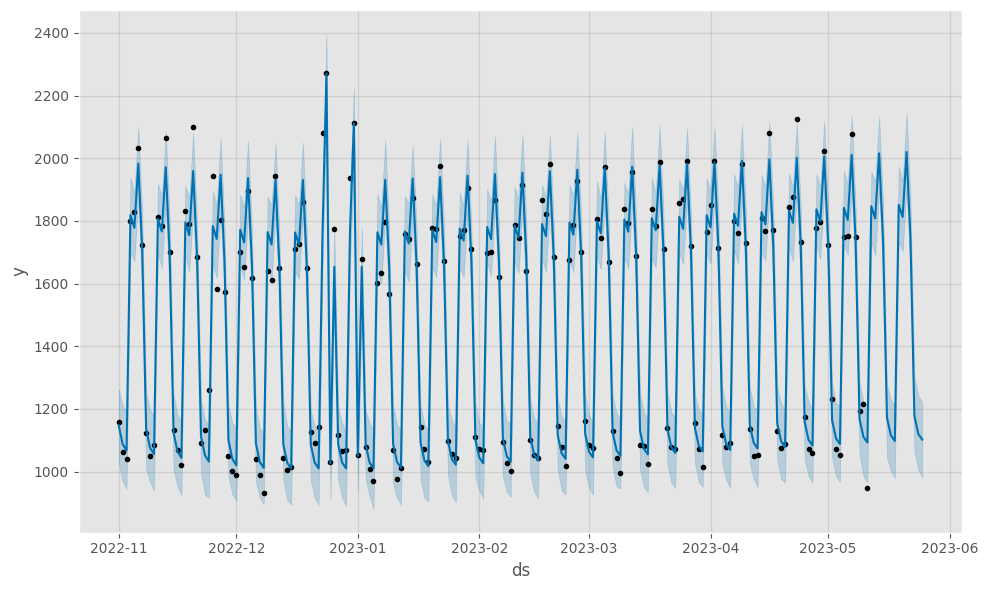

In [90]:
plot1 = m.plot(forecast)